# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('chipotle').getOrCreate()
spark

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
from pyspark import SparkFiles

### Step 3. Assign it to a variable called chipo.

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

spark.sparkContext.addFile(url)

chipo = spark.read.csv(SparkFiles.get("chipotle.tsv"), header=True, inferSchema=True, sep='\t')
chipo.show(5)

+--------+--------+--------------------+--------------------+----------+
|order_id|quantity|           item_name|  choice_description|item_price|
+--------+--------+--------------------+--------------------+----------+
|       1|       1|Chips and Fresh T...|                NULL|    $2.39 |
|       1|       1|                Izze|        [Clementine]|    $3.39 |
|       1|       1|    Nantucket Nectar|             [Apple]|    $3.39 |
|       1|       1|Chips and Tomatil...|                NULL|    $2.39 |
|       2|       2|        Chicken Bowl|[Tomatillo-Red Ch...|   $16.98 |
+--------+--------+--------------------+--------------------+----------+
only showing top 5 rows



### Step 4. See the first 10 entries

In [4]:
chipo.show(10)

+--------+--------+--------------------+--------------------+----------+
|order_id|quantity|           item_name|  choice_description|item_price|
+--------+--------+--------------------+--------------------+----------+
|       1|       1|Chips and Fresh T...|                NULL|    $2.39 |
|       1|       1|                Izze|        [Clementine]|    $3.39 |
|       1|       1|    Nantucket Nectar|             [Apple]|    $3.39 |
|       1|       1|Chips and Tomatil...|                NULL|    $2.39 |
|       2|       2|        Chicken Bowl|[Tomatillo-Red Ch...|   $16.98 |
|       3|       1|        Chicken Bowl|[Fresh Tomato Sal...|   $10.98 |
|       3|       1|       Side of Chips|                NULL|    $1.69 |
|       4|       1|       Steak Burrito|[Tomatillo Red Ch...|   $11.75 |
|       4|       1|    Steak Soft Tacos|[Tomatillo Green ...|    $9.25 |
|       5|       1|       Steak Burrito|[Fresh Tomato Sal...|    $9.25 |
+--------+--------+--------------------+-----------

### Step 5. Create a histogram of the top 5 items bought

In [16]:
top5 = chipo.groupBy('item_name').count().orderBy('count',ascending=0).limit(5)
top5.show()

+-------------------+-----+
|          item_name|count|
+-------------------+-----+
|       Chicken Bowl|  726|
|    Chicken Burrito|  553|
|Chips and Guacamole|  479|
|      Steak Burrito|  368|
|  Canned Soft Drink|  301|
+-------------------+-----+



In [19]:
type(top5)

pyspark.sql.dataframe.DataFrame

In [23]:
top5_df = top5.toPandas()
print(type(top5_df))

<class 'pandas.core.frame.DataFrame'>


In [26]:
top5_df

,item_name,count
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301


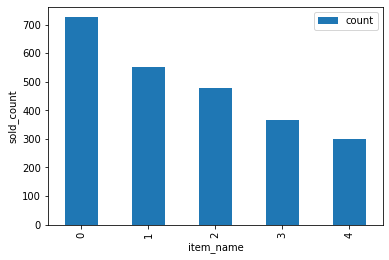

In [28]:
top5_df.plot(kind = 'bar')
plt.xlabel('item_name')
plt.ylabel('sold_count')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

### Step 7. BONUS: Create a question and a graph to answer your own question.